Output()

[PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/9/logs/eval/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/8/logs/eval/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/6/logs/eval/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/10/logs/eval/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/3/logs/eval/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/5/logs/eval/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/7/logs/eval/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/2/logs/eval/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/4/logs/eval/train/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_s

Output()

[PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/9/logs/eval/test/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/8/logs/eval/test/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/6/logs/eval/test/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/10/logs/eval/test/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/3/logs/eval/test/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/5/logs/eval/test/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/7/logs/eval/test/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/2/logs/eval/test/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/4/logs/eval/test/PerformanceTrackingWrapper.jsonl'), PosixPath('../runs/CMA-ES/seplow_train/ppo_sb3/full/1

/pc2/users/i/intexml2/.local/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  func(*args, **kwargs)
/pc2/users/i/intexml2/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


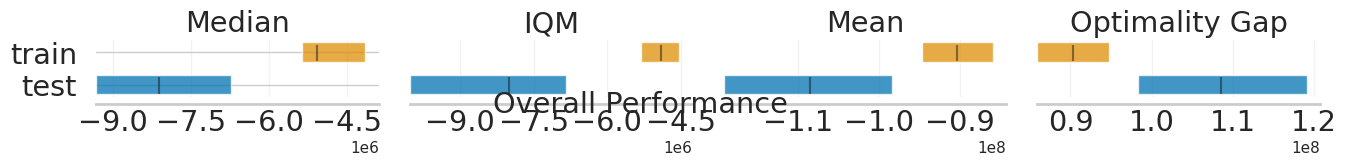

In [7]:
from pathlib import Path
from instance_dac.utils.data_loading import load_performance_data
import pandas as pd
import numpy as np
from rliable import library as rly
from rliable import metrics
from rliable import plot_utils
import seaborn as sns

sns.set_style("whitegrid")



path = Path("../runs/CMA-ES/seplow_train/ppo_sb3/full")
train_set_id = "train"
test_set_id = "test"

D = []
data = load_performance_data(path, search_prefix=f"/eval/{train_set_id}/")
data["origin"] = "train"
D.append(data)
data = load_performance_data(path, search_prefix=f"/eval/{test_set_id}/")
data["origin"] = "test"
if data:
  D.append(data)
data = pd.concat(D)

perf = pd.DataFrame(data.groupby(["origin", "seed", "instance"])["overall_performance"].mean())
perf_dict = {}
for gid, gdf in perf.groupby("origin"):
    gdf = gdf.reset_index()
    P = gdf["overall_performance"].to_numpy()
    P = P.reshape((gdf["seed"].nunique(), gdf["instance"].nunique()))
    perf_dict[gid] = P




algorithms = list(perf_dict.keys())
# Load ALE scores as a dictionary mapping algorithms to their human normalized
# score matrices, each of which is of size `(num_runs x num_games)`.
aggregate_func = lambda x: np.array([
  metrics.aggregate_median(x),
  metrics.aggregate_iqm(x),
  metrics.aggregate_mean(x),
  metrics.aggregate_optimality_gap(x)])
aggregate_scores, aggregate_score_cis = rly.get_interval_estimates(
  perf_dict, aggregate_func, reps=5000)
fig, axes = plot_utils.plot_interval_estimates(
  aggregate_scores, aggregate_score_cis,
  metric_names=['Median', 'IQM', 'Mean', 'Optimality Gap'],
  algorithms=algorithms, xlabel='Overall Performance')

fig.set_tight_layout(True)

In [4]:
perf_dict

{'test': array([[-9.70070259e+00, -4.82472248e+08, -9.95316639e+05,
         -1.49418460e+06, -9.21486377e+06, -4.94488159e+07,
         -5.63849324e+05, -1.10461497e+07, -7.20507259e+06,
         -5.23745650e+08],
        [-2.01925486e+01, -4.33691549e+08, -9.29890617e+05,
         -1.27896515e+06, -9.06157327e+06, -2.92204951e+07,
         -4.27658333e+05, -4.87638625e+06, -3.05210312e+06,
         -3.91505071e+08],
        [-6.12966665e+00, -6.24429279e+08, -1.02112346e+06,
         -1.56224907e+06, -9.30999264e+06, -1.04962687e+08,
         -6.19154980e+05, -2.40466595e+07, -1.56191069e+07,
         -7.57499124e+08],
        [-8.68157134e+00, -3.32405386e+08, -8.78913364e+05,
         -1.28092556e+06, -9.20282957e+06, -4.68105115e+07,
         -5.36254867e+05, -1.14105061e+07, -9.29827457e+06,
         -6.59650861e+08],
        [-2.95622545e+01, -5.77639637e+08, -1.09239750e+06,
         -1.59526827e+06, -9.51920345e+06, -1.10398421e+08,
         -6.02207774e+05, -1.83342915e+07, -